# 프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!

---

## Import

In [1]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load data

In [2]:
diabetes = load_diabetes()
dir(diabetes)

['DESCR',
 'data',
 'data_filename',
 'feature_names',
 'frame',
 'target',
 'target_filename']

In [3]:
dfX = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
dfy = pd.DataFrame(diabetes.target, columns=['target'])

In [4]:
dfX

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [5]:
dfy

,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


In [6]:
X = dfX.values
y = dfy['target'].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Model

In [8]:
W = np.random.rand(10)
b = np.random.rand()

In [9]:
W

array([0.94406167, 0.74863657, 0.62228134, 0.50858738, 0.45671467,
       0.42112732, 0.98502139, 0.11800963, 0.46689158, 0.66368695])

In [10]:
b

0.8192914938424392

In [11]:
def model(X,W,b):
    predictions = 0
    for i in range(10):
        predictions += X[:,i]*W[i]
    predictions += b
    return predictions

## Loss function

In [12]:
def MSE(a,b):
    mse = ((a-b)**2).mean()
    return mse

In [13]:
def loss(X,W,b,y):
    predictions = model(X,W,b)
    Loss = MSE(predictions,y)
    return Loss

## Gradient function

In [14]:
def gradient(X,W,b,y):
    N = len(W)
    y_pred = model(X,W,b)
    
    dW = 1/N * 2 * (X.T).dot(y_pred-y)
    db = 2 * (y_pred-y).mean()
    return dW, db

## Train

In [15]:
learning_rate = 0.001

In [19]:
losses = []

for i in range(1, 2001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= learning_rate*dW
    b -= learning_rate*db
    L = loss(X, W, b, y)
    losses.append(L)
    
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 2887.7502
Iteration 20 : Loss 2887.7457
Iteration 30 : Loss 2887.7412
Iteration 40 : Loss 2887.7367
Iteration 50 : Loss 2887.7322
Iteration 60 : Loss 2887.7277
Iteration 70 : Loss 2887.7232
Iteration 80 : Loss 2887.7188
Iteration 90 : Loss 2887.7144
Iteration 100 : Loss 2887.7100
Iteration 110 : Loss 2887.7056
Iteration 120 : Loss 2887.7012
Iteration 130 : Loss 2887.6968
Iteration 140 : Loss 2887.6925
Iteration 150 : Loss 2887.6882
Iteration 160 : Loss 2887.6838
Iteration 170 : Loss 2887.6795
Iteration 180 : Loss 2887.6753
Iteration 190 : Loss 2887.6710
Iteration 200 : Loss 2887.6667
Iteration 210 : Loss 2887.6625
Iteration 220 : Loss 2887.6583
Iteration 230 : Loss 2887.6541
Iteration 240 : Loss 2887.6499
Iteration 250 : Loss 2887.6457
Iteration 260 : Loss 2887.6416
Iteration 270 : Loss 2887.6374
Iteration 280 : Loss 2887.6333
Iteration 290 : Loss 2887.6292
Iteration 300 : Loss 2887.6251
Iteration 310 : Loss 2887.6210
Iteration 320 : Loss 2887.6169
Iteration 330 : L

## Prediction

In [20]:
predictions = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

3034.5773478789997

## Visualization

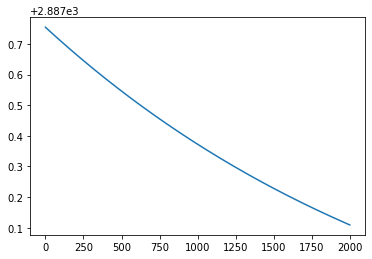

In [21]:
plt.plot(losses)
plt.show()

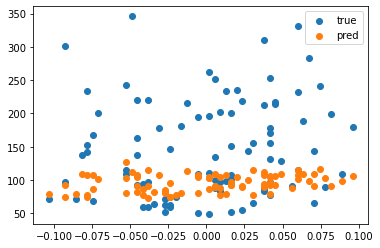

In [19]:
plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], predictions, label="pred")
plt.legend()
plt.show()

# 프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

## Import

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---

## Load data

In [21]:
train = pd.read_csv("~/aiffel/Project/EXPLORATION/E5/train.csv")
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## Create column

In [22]:
train['datetime'] = pd.to_datetime(train['datetime'], format='%Y-%m-%d %H:%M:%S')

In [23]:
train['year'] = pd.DatetimeIndex(train['datetime']).year
train['month'] = pd.DatetimeIndex(train['datetime']).month
train['day'] = pd.DatetimeIndex(train['datetime']).day
train['hour'] = pd.DatetimeIndex(train['datetime']).hour
train['minute'] = pd.DatetimeIndex(train['datetime']).minute
train['second'] = pd.DatetimeIndex(train['datetime']).second

In [24]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


## Visualization

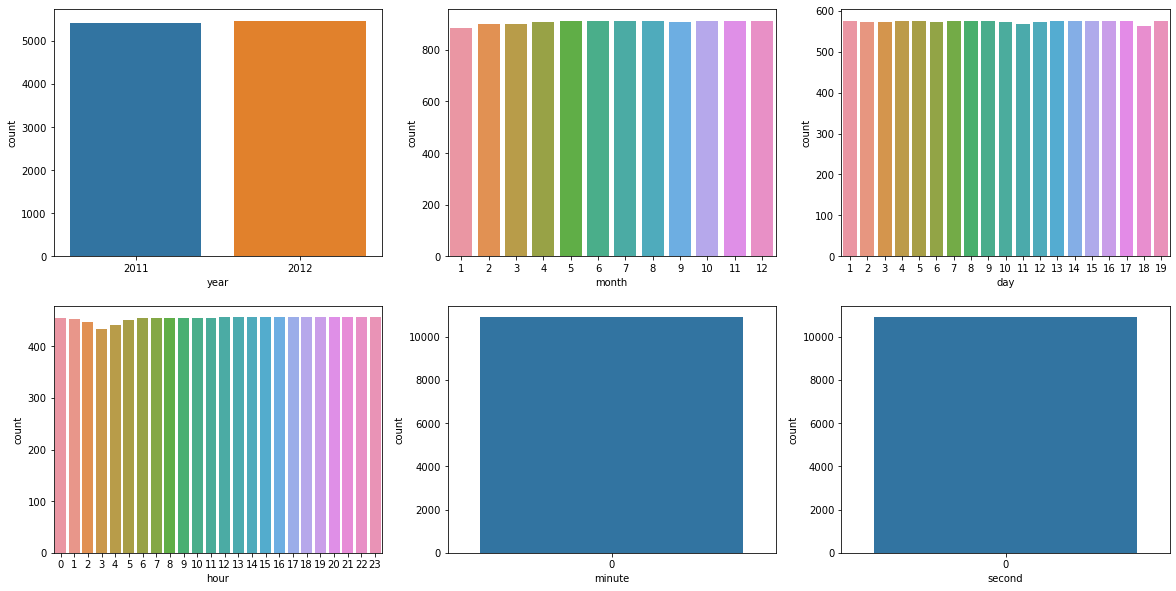

In [25]:
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
sns.countplot(x='year', data=train)

plt.subplot(2,3,2)
sns.countplot(x='month', data=train)

plt.subplot(2,3,3)
sns.countplot(x='day', data=train)

plt.subplot(2,3,4)
sns.countplot(x='hour', data=train)

plt.subplot(2,3,5)
sns.countplot(x='minute', data=train)

plt.subplot(2,3,6)
sns.countplot(x='second', data=train)

plt.show()

## Train Test split

In [26]:
X = train[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'year', 'month', 'day', 'hour', 'minute']].values
y = train[['count']].values

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

## Train

In [28]:
model = LinearRegression()

In [29]:
model.fit(X_train, y_train)

LinearRegression()

## Prediction

In [30]:
predictions = model.predict(X_test)
predictions

array([[127.],
       [ 73.],
       [190.],
       ...,
       [151.],
       [130.],
       [126.]])

In [35]:
rmse = mean_squared_error(y_test, predictions, squared = False)
rmse

9.137224331864676e-13

## Visualization

In [36]:
col = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'year', 'month', 'day', 'hour', 'minute']
X_test_df = pd.DataFrame(X_test, columns=col)
X_test_df['predictions'] = predictions

In [37]:
X_test_df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,year,month,day,hour,minute,predictions
0,1.0,0.0,1.0,2.0,6.56,9.090,80.0,8.9981,3.0,124.0,2011.0,2.0,4.0,9.0,0.0,127.0
1,2.0,0.0,1.0,2.0,14.76,16.665,71.0,19.0012,10.0,63.0,2011.0,4.0,8.0,10.0,0.0,73.0
2,3.0,0.0,1.0,3.0,24.60,27.275,88.0,8.9981,14.0,176.0,2011.0,9.0,7.0,9.0,0.0,190.0
3,2.0,0.0,1.0,1.0,16.40,20.455,56.0,23.9994,7.0,4.0,2011.0,4.0,4.0,1.0,0.0,11.0
4,4.0,0.0,1.0,2.0,22.14,25.760,49.0,8.9981,73.0,237.0,2012.0,10.0,17.0,13.0,0.0,310.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173,1.0,0.0,1.0,1.0,12.30,13.635,61.0,19.9995,1.0,4.0,2012.0,3.0,7.0,1.0,0.0,5.0
2174,1.0,0.0,1.0,1.0,28.70,31.820,39.0,16.9979,79.0,634.0,2012.0,3.0,15.0,17.0,0.0,713.0
2175,2.0,0.0,1.0,1.0,18.86,22.725,72.0,15.0013,46.0,105.0,2011.0,5.0,6.0,22.0,0.0,151.0
2176,1.0,0.0,1.0,1.0,12.30,13.635,42.0,31.0009,6.0,124.0,2012.0,1.0,18.0,13.0,0.0,130.0


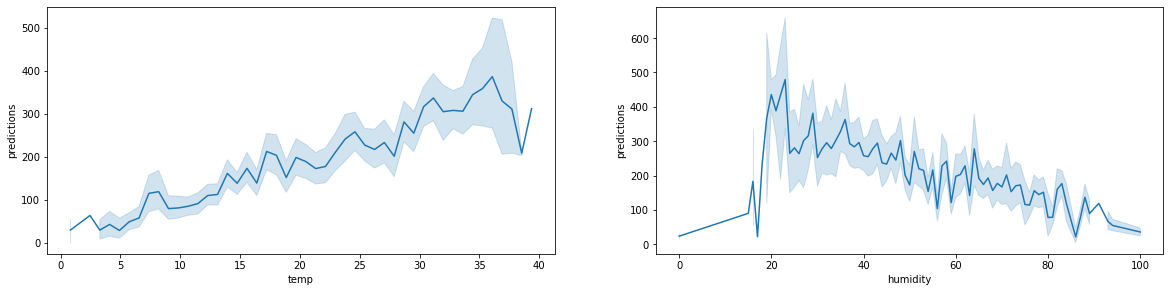

In [38]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.lineplot(x=X_test_df['temp'], y=X_test_df['predictions'])

plt.subplot(2,2,2)
sns.lineplot(x=X_test_df['humidity'], y=X_test_df['predictions'])

plt.show()